In [1]:
import numpy as np
from pymanopt.manifolds import Sphere
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

import mala.potentials
import mala.utils as my
import mala.metropolis_hastings as vanilla_mh
import mala.MA_metropolis_hastings as mamh

%load_ext autoreload
%autoreload 2

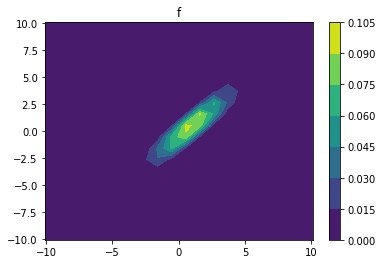

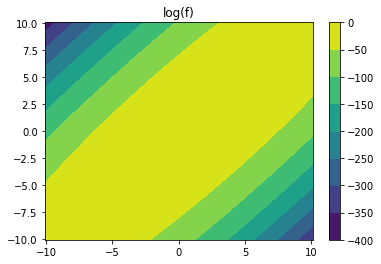

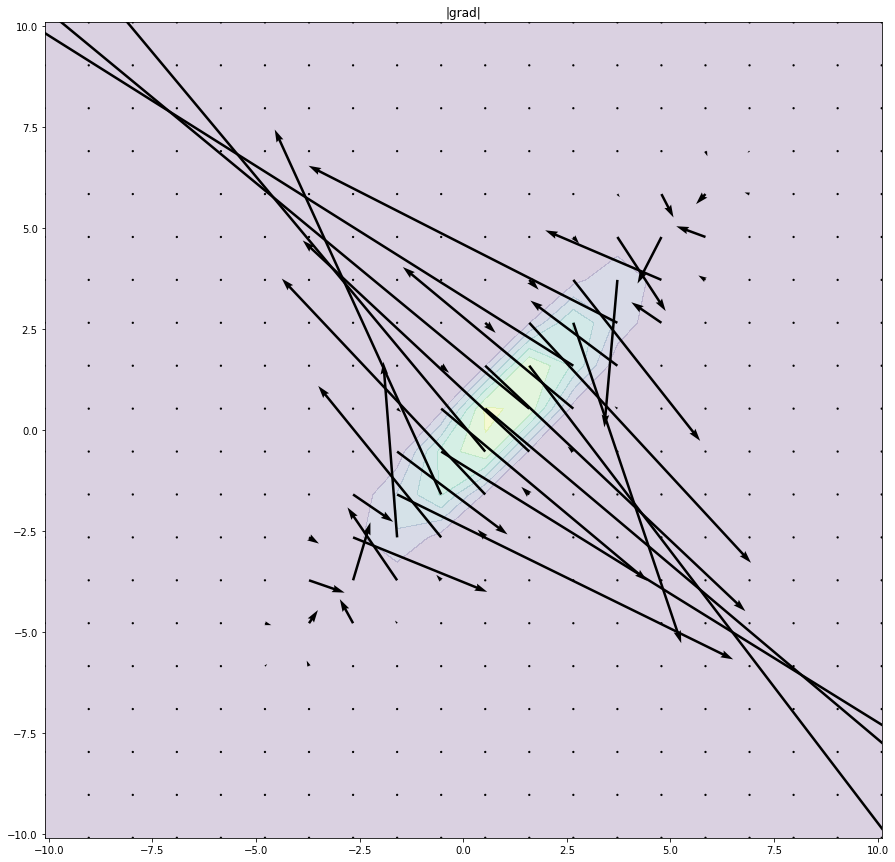

In [2]:
Sigma = 3*np.array([[ 1. , 1.0], [1.0,  1.2]])
Mu = np.array([1,0.5])

H = mala.potentials.Gaussian(ambient_dim=2,
                                   proper_dim = 2,mu = Mu,cov=Sigma)
my.plot_potential(H,[-10,10])

# Compare how quickly manifold langevin converges vs vanilla langevin

Compare multiple methods of calculating Fisher information matrix

Manifold-Adjusted MALA


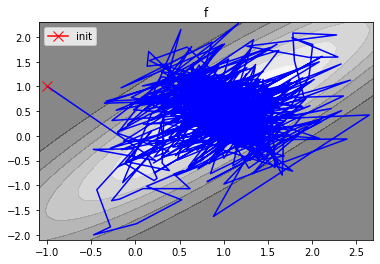

Last  100  samples: estimated covariance
[[ 0.15661745 -0.05625718]
 [-0.05625718  0.20382761]]


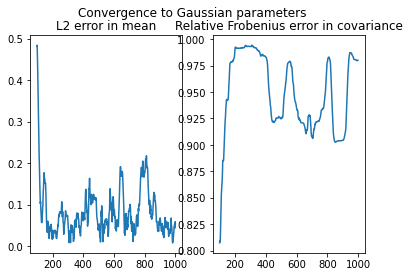

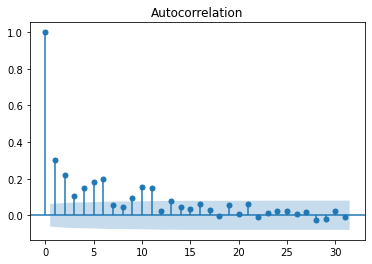

MALA


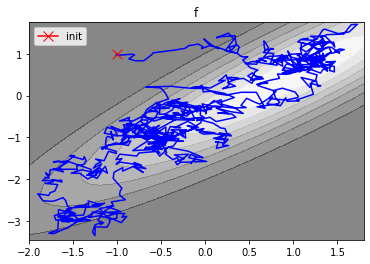

Last  100  samples: estimated covariance
[[ 0.08333519 -0.03658588]
 [-0.03658588  0.14332477]]


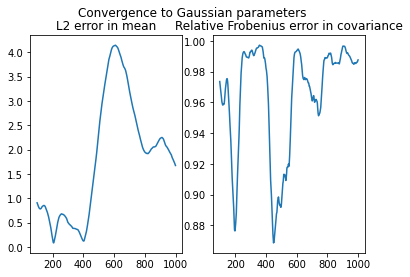

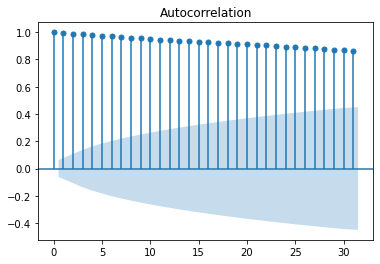

Gaussian


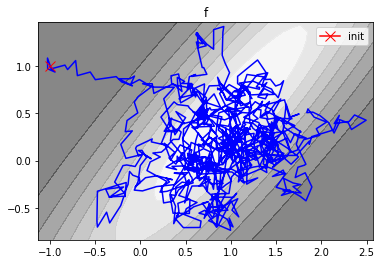

Last  100  samples: estimated covariance
[[0.0743927  0.01948031]
 [0.01948031 0.074891  ]]


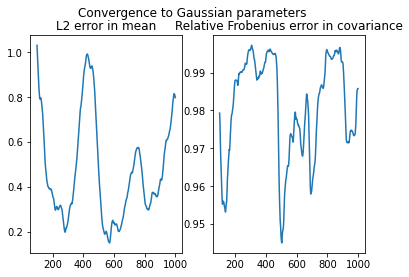

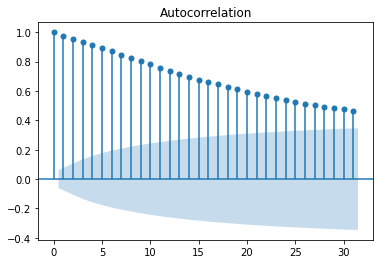

In [4]:
x_0 = 1*np.array([-1,1])
T = 1000

# Use the observed Fisher information matrix as an approximation of the 
# Fisher-Rao metric
step_size=0.5
burnin = np.int(0.1*T)
print('Manifold-Adjusted MALA')
info_matrix = (lambda x,traj : mamh.empirical_Fisher_metric(H,x,traj,burnin))
evolution = mamh.MAMH(_,H,
                 update_rule=(lambda x,traj: mamh.const_K_langevin(x,traj,info_matrix,H,step_size)),
                     initial_point=x_0,max_steps=T)
my.plot_2D_evolution(H,evolution,gradient=False)
my.Gaussian_convergence(H,evolution,print_cov=True)

plot_acf(np.array([v.pos[0] for v in evolution]))
plt.show()

step_size=0.1

# Vanilla
print('MALA')
identity_matrix = (lambda x,_ : np.identity(x.size))
evolution = mamh.MAMH(_,H,
                 update_rule=(lambda x,traj: mamh.const_K_langevin(x,traj,identity_matrix,H,step_size)),
                     initial_point=x_0,max_steps=T)
my.plot_2D_evolution(H,evolution,gradient=False)
my.Gaussian_convergence(H,evolution,print_cov=True)

plot_acf(np.array([v.pos[0] for v in evolution]))
plt.show()

# Gaussian update
print('Gaussian')
evolution = mamh.MAMH(_,H,
                 update_rule=(lambda x,_: vanilla_mh.gaussian(_,x,radius=step_size)),
                     initial_point=x_0,max_steps=T)
my.plot_2D_evolution(H,evolution,gradient=False)
my.Gaussian_convergence(H,evolution,print_cov=True)

plot_acf(np.array([v.pos[0] for v in evolution]))
plt.show()

